This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [1]:
from physicsinformedQ1 import PhysicsInformedBarModel
import utilities
import numpy as np
import torch
import matplotlib.pyplot as plt

2. Analytical solution is derived for validation

In [2]:
u_analytic = lambda x: 5*np.log(1+x)        # defining the function for u(x)

3. Problem data are defined. Here the known data like mechanical parameters, boundary condition and loading conditions are defined

In [3]:
E = lambda x: 2
A = lambda x: 1+x        
L = 1
u0 = [0,5*np.log(1+L)]  # Dirichlet boundary conditions for both edges
distLoad = lambda x: 10

4. Next we generate the neural network model using the imported class PhysicsInformedBarModel

In [4]:
pinnModel = PhysicsInformedBarModel(E, A, L, u0, dist_load=distLoad)

check 2


5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [5]:
epochs = 500
learningRate = 1e-2

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate)        # training the model

Epoch: 0/499		Differential equation loss = 253.810822		Boundary condition loss = 12.206429		Total loss = 266.017242
Epoch: 100/499		Differential equation loss = 0.000008		Boundary condition loss = 0.000000		Total loss = 0.000008
Epoch: 200/499		Differential equation loss = 0.000008		Boundary condition loss = 0.000000		Total loss = 0.000008
Epoch: 300/499		Differential equation loss = 0.000008		Boundary condition loss = 0.000000		Total loss = 0.000008
Epoch: 400/499		Differential equation loss = 0.000008		Boundary condition loss = 0.000000		Total loss = 0.000008
Epoch: 499/499		Differential equation loss = 0.000008		Boundary condition loss = 0.000000		Total loss = 0.000008


6. We generate sample test data using utilities library and then predict the displacements at those test points

In [6]:
samples = 50
x_test = utilities.generate_grid_1d(L, samples)
u_test = pinnModel.get_displacements(x_test)

7. We plot predicted displacements at test points and also the training history

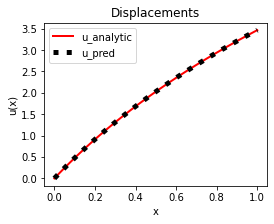

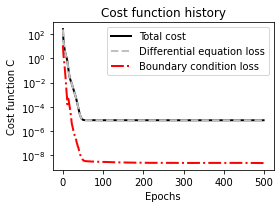

In [7]:
utilities.plot_displacements_bar(x_test, u_test, u_analytic)

pinnModel.plot_training_history()
